[[ 6.98553633e-01 -3.78289607e-01]
 [-2.48422424e-01  1.91071221e-01]
 [-1.78759035e-01  2.53697475e-01]
 [-7.30467124e-03 -2.59266690e-01]
 [-1.59844140e-01  2.66915921e-01]
 [-8.01071690e-01 -1.08656135e-01]
 [ 1.00816914e+00  2.07309295e-01]
 [ 4.39780516e-02 -2.80236072e-01]
 [-8.34853704e-02 -1.38114367e-01]
 [-9.88928208e-01 -9.26102014e-02]
 [ 8.83638650e-02  1.96647051e-01]
 [ 2.22010570e-01  5.62848283e-02]
 [ 7.74176833e-01  8.22258534e-01]
 [ 6.42098042e-02  1.77475658e-01]
 [ 3.29904597e-01 -6.76348560e-02]
 [ 9.37162087e-01  2.05987221e-01]
 [-2.00792169e-01  5.35547075e-02]
 [ 5.32997317e-02 -2.82138380e-01]
 [-9.93783900e-02 -3.28183801e-01]
 [ 1.02684872e+00 -2.66939738e-01]
 [-8.69193490e-01  6.85448273e-01]
 [-6.70339467e-03  2.44518907e-01]
 [ 2.31538284e-02 -8.12416827e-01]
 [ 1.03822075e-01  1.19298417e-01]
 [-9.57389366e-01 -3.49206448e-01]
 [-7.98982279e-02  2.30581375e-01]
 [ 1.31496662e-01  4.30585961e-02]
 [ 3.68169092e-02  9.51356467e-01]
 [ 6.71357733e-01 -8

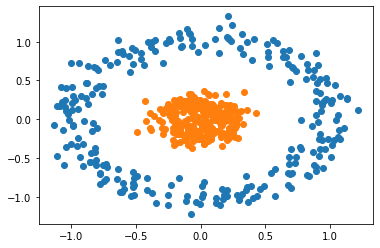

In [5]:
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn import datasets
    import keras
    from keras.models import Sequential
    from keras.layers import Dense
    from keras.optimizers import Adam

    np.random.seed(0)

    n_pts = 500
    X, y = datasets.make_circles(n_samples=n_pts, random_state = 123, noise=0.1, factor=0.2)
    print(X) 
    print(y)
     
    plt.scatter(X[y==0, 0], X[y==0, 1])
    plt.scatter(X[y==1, 0], X[y==1, 1])

In [6]:
    model = Sequential()
    model.add(Dense(4, input_shape=(2,), activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(Adam(lr = 0.01), 'binary_crossentropy', metrics=['accuracy'])
    h = model.fit(x=X,y=y,verbose=1,batch_size=20,epochs=100,shuffle='true')

Epoch 1/100
25/25 [==============================] - 0s 624us/step - loss: 0.8103 - accuracy: 0.5000
Epoch 2/100
25/25 [==============================] - 0s 625us/step - loss: 0.7174 - accuracy: 0.5000
Epoch 3/100
25/25 [==============================] - 0s 625us/step - loss: 0.6980 - accuracy: 0.5420
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6954 - accuracy: 0.6540
Epoch 5/100
25/25 [==============================] - 0s 625us/step - loss: 0.6950 - accuracy: 0.4800
Epoch 6/100
25/25 [==============================] - 0s 625us/step - loss: 0.6947 - accuracy: 0.3700
Epoch 7/100
25/25 [==============================] - 0s 260us/step - loss: 0.6944 - accuracy: 0.5380
Epoch 8/100
25/25 [==============================] - 0s 625us/step - loss: 0.6933 - accuracy: 0.6540
Epoch 9/100
25/25 [==============================] - 0s 625us/step - loss: 0.6930 - accuracy: 0.3980
Epoch 10/100
25/25 [==============================] - 0s 625us/step - loss: 0.6929 - accuracy

25/25 [==============================] - 0s 0s/step - loss: 0.0568 - accuracy: 0.9980
Epoch 82/100
25/25 [==============================] - 0s 0s/step - loss: 0.0552 - accuracy: 0.9980
Epoch 83/100
25/25 [==============================] - 0s 0s/step - loss: 0.0537 - accuracy: 0.9980
Epoch 84/100
25/25 [==============================] - 0s 625us/step - loss: 0.0522 - accuracy: 0.9980
Epoch 85/100
25/25 [==============================] - 0s 625us/step - loss: 0.0508 - accuracy: 0.9980
Epoch 86/100
25/25 [==============================] - 0s 260us/step - loss: 0.0496 - accuracy: 0.9980
Epoch 87/100
25/25 [==============================] - 0s 626us/step - loss: 0.0481 - accuracy: 0.9980
Epoch 88/100
25/25 [==============================] - 0s 624us/step - loss: 0.0469 - accuracy: 0.9980
Epoch 89/100
25/25 [==============================] - 0s 625us/step - loss: 0.0456 - accuracy: 0.9980
Epoch 90/100
25/25 [==============================] - 0s 625us/step - loss: 0.0445 - accuracy: 0.9980
Ep

Text(0.5, 0, 'epoch')

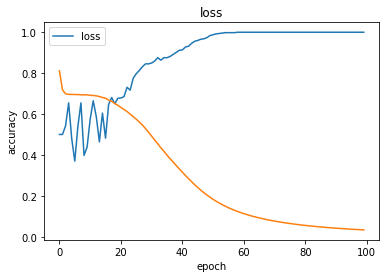

In [7]:
    plt.plot(h.history['accuracy'])
    plt.legend(['accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
     
    plt.plot(h.history['loss'])
    plt.legend(['loss'])
    plt.title('loss')
    plt.xlabel('epoch')

Prediction is:  [[0.09005141]]


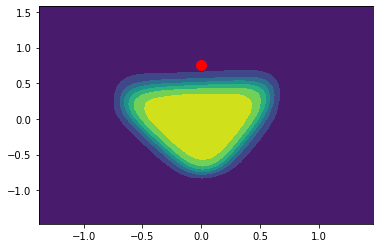

In [9]:
    def plot_decision_boundary(X, y, model):
        x_span = np.linspace(min(X[:,0]) - 0.25, max(X[:,0]) + 0.25)
        y_span = np.linspace(min(X[:,1]) - 0.25, max(X[:,1]) + 0.25)
        xx, yy = np.meshgrid(x_span, y_span)
        grid = np.c_[xx.ravel(), yy.ravel()]
        pred_func = model.predict(grid)
        z = pred_func.reshape(xx.shape)
        plt.contourf(xx, yy, z)

    plot_decision_boundary(X, y, model)
    plt.scatter(X[y==0, 0], X[y==0, 1])
    plt.scatter(X[y==1, 0], X[y==1, 1])

    plot_decision_boundary(X, y, model)
    plt.scatter(X[y==0, 0], X[y==0, 1])
    plt.scatter(X[y==1, 0], X[y==1, 1])
     
    x = 0
    y = 0.75
     
    point = np.array([[x, y]])
    predict = model.predict(point)
    plt.plot([x], [y], marker='o', markersize=10, color="red")
    print("Prediction is: ", predict)